In [4]:
# Lecture 3: EDA and Visualization Demo
## RUN THIS CELL TO PROPERLY HIGHLIGHT THE EXERCISES
import requests
from IPython.core.display import HTML
styles = requests.get("https://raw.githubusercontent.com/Harvard-IACS/2018-CS109A/master/content/styles/cs109.css").text
HTML(styles)

import warnings
warnings.filterwarnings('ignore')

In [ ]:
# https://harvard-iacs.github.io/2018-CS109A/labs/lecture-3/notebook/

In [ ]:
# EDA and visualization

In [2]:
# The %... is an iPython thing, and is not part of the Python language.
# In this case we're just telling the plotting library to draw things on
# the notebook, instead of on a separate window.
%matplotlib inline 
#this line above prepares IPython notebook for working with matplotlib

# See all the "as ..." contructs? They're just aliasing the package names.
# That way we can call methods like plt.plot() instead of matplotlib.pyplot.plot().

import numpy as np # imports a fast numerical programming library
import scipy as sp #imports stats functions, amongst other things
import matplotlib as mpl # this actually imports matplotlib
import matplotlib.cm as cm #allows us easy access to colormaps
import matplotlib.pyplot as plt #sets up plotting under plt
import pandas as pd #lets us handle data as dataframes
#sets up pandas table display
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)

In [5]:
# versions below 0.8.1
import seaborn.apionly as sns #sets up styles and gives us more plotting options

In [ ]:
# Getting the mtcars dataset into shape

In [6]:
dfcars=pd.read_csv("mtcars.csv")
dfcars.head()

,Unnamed: 0,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [7]:
# rename column
dfcars=dfcars.rename(columns={"Unnamed: 0":"name"})
dfcars.head()

,name,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [8]:
dfcars.shape

(32, 12)

In [10]:
# split name into maker
dfcars['maker'] = dfcars.name.apply(lambda x: x.split()[0])
dfcars['maker'][0:5]

0     Mazda
1     Mazda
2    Datsun
3    Hornet
4    Hornet
Name: maker, dtype: object

In [11]:
dfcars.head()

,name,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,maker
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4,Mazda
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4,Mazda
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1,Datsun
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1,Hornet
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2,Hornet


In [15]:
av_mpg = dfcars.groupby('maker').mpg.mean()
print(av_mpg.min(), av_mpg.max())

10.4 30.4


In [ ]:
# Simple EDA

In [17]:
sns.set_context("notebook")
sns.color_palette()

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)]

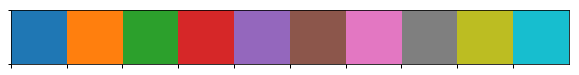

In [18]:
sns.palplot(sns.color_palette())

In [19]:
output = sns.choose_colorbrewer_palette(data_type="qualitative")

interactive(children=(Dropdown(description='name', options=('Set1', 'Set2', 'Set3', 'Paired', 'Accent', 'Paste…

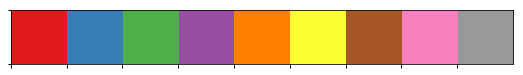

In [20]:
sns.palplot(output)

In [21]:
sns.set_palette(output)

In [22]:
# Bar Charts

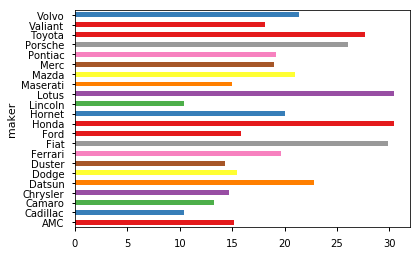

In [23]:
av_mpg.plot(kind='barh')

In [24]:
sns.reset_defaults()

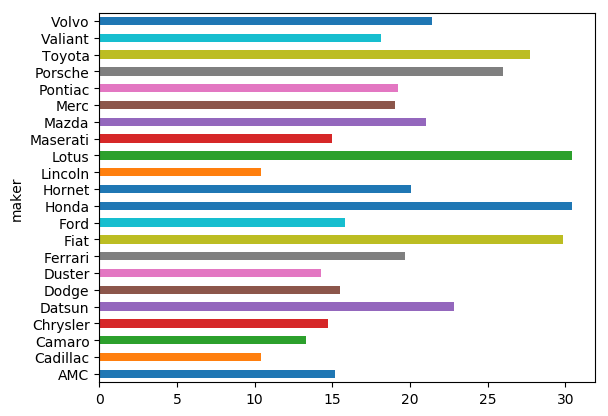

In [25]:
av_mpg.plot(kind='barh')

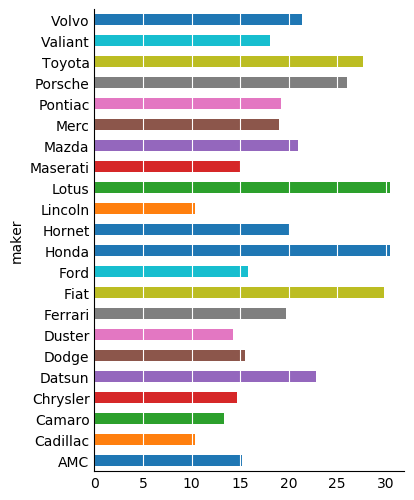

In [26]:
plt.figure(figsize=(4, 6))
ax = plt.gca()
av_mpg.plot(kind="barh")
plt.grid(axis = 'x', color ='white', linestyle='-')
ax.tick_params(axis='both', which='both',length=0)
sns.despine()

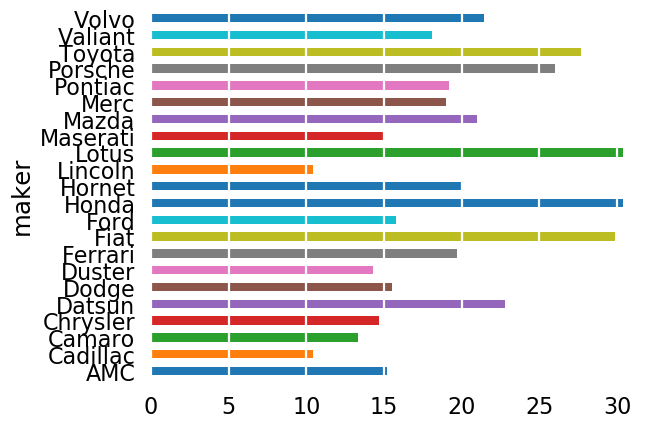

In [27]:
with sns.plotting_context("poster"):
    ax = plt.gca()
    av_mpg.plot(kind="barh")
    plt.grid(axis = 'x', color ='white', linestyle='-')
    ax.tick_params(axis='both', which='both',length=0)
    sns.despine(left=True, bottom=True)

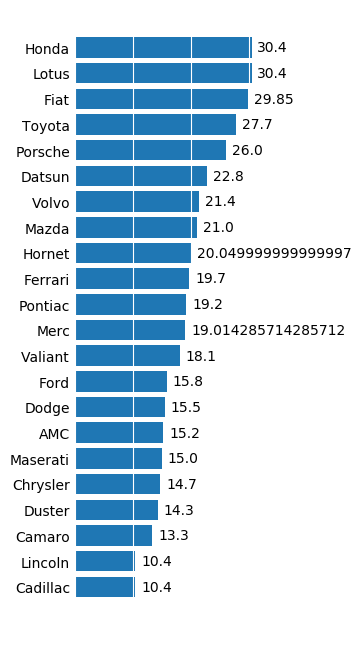

In [28]:
plt.figure(figsize=(3, 8))
ax = plt.gca()
av_mpg2 = av_mpg.sort_values()
makes = av_mpg2.index
speeds = av_mpg2.values
nums = np.arange(len(av_mpg2))
plt.barh(nums, speeds)
for p, c, ch in zip(nums, makes, speeds):
    plt.annotate(str(ch), xy=(ch + 1, p), va='center')
ticks = plt.yticks(nums, makes)
xt = plt.xticks()[0]
plt.xticks(xt, [' '] * len(xt))
plt.grid(axis = 'x', color ='white', linestyle='-')
ax.tick_params(axis='both', which='both',length=0)
sns.despine(left=True, bottom=True)

In [29]:
# Histograms

Text(0.5,0,'mpg')

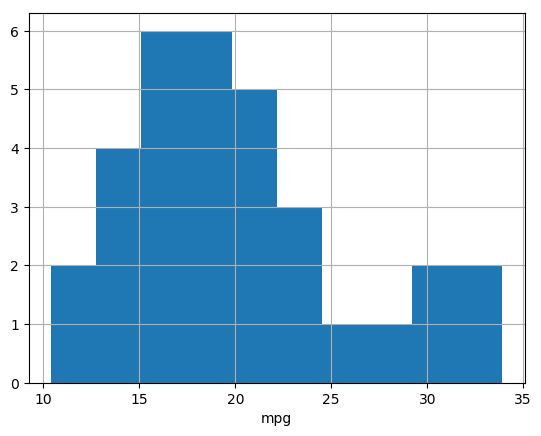

In [30]:
dfcars.mpg.hist()
plt.xlabel("mpg")

(array([2., 4., 6., 6., 5., 3., 1., 1., 2., 2.]),
 array([10.4 , 12.75, 15.1 , 17.45, 19.8 , 22.15, 24.5 , 26.85, 29.2 ,
        31.55, 33.9 ]),
 <a list of 10 Patch objects>)

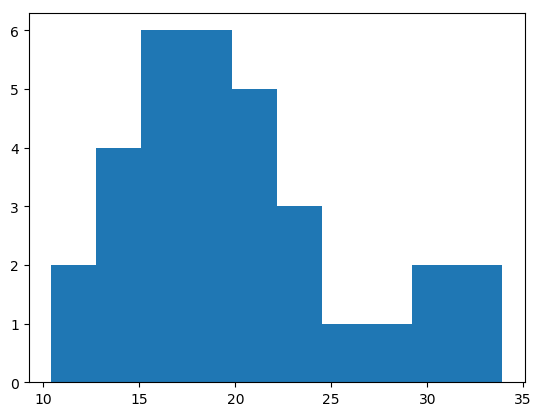

In [31]:
# in matplotlib
plt.hist(dfcars.mpg.values)

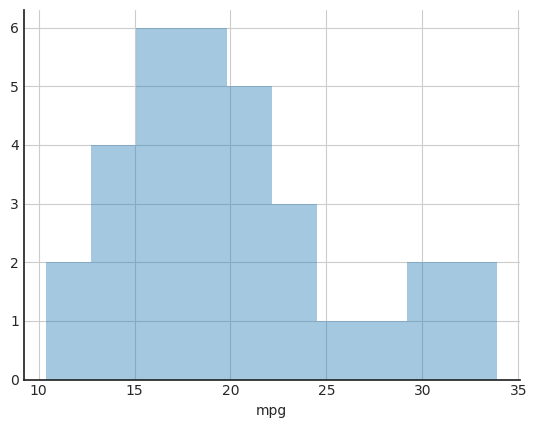

In [32]:
# in sns
with sns.axes_style('white'):
    dfcars.mpg.hist(alpha=0.4)
    plt.xlabel('mpg')
    sns.despine()

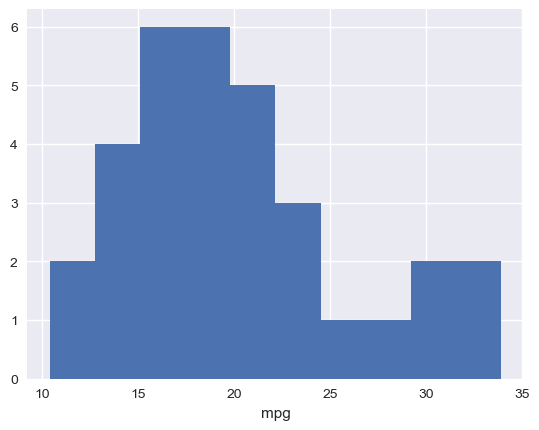

In [35]:
# sns default
sns.set()
dfcars.mpg.hist()
plt.xlabel("mpg")
sns.despine()

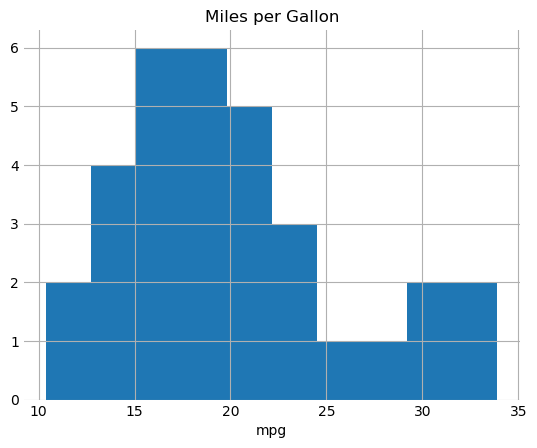

In [36]:
# reset back to matplotlib
sns.reset_defaults()
ax = plt.gca()
dfcars.mpg.hist()
plt.xlabel("mpg");
plt.title("Miles per Gallon")
ax.tick_params(axis='both', which='both',length=0)
sns.despine(bottom=True, left=True)

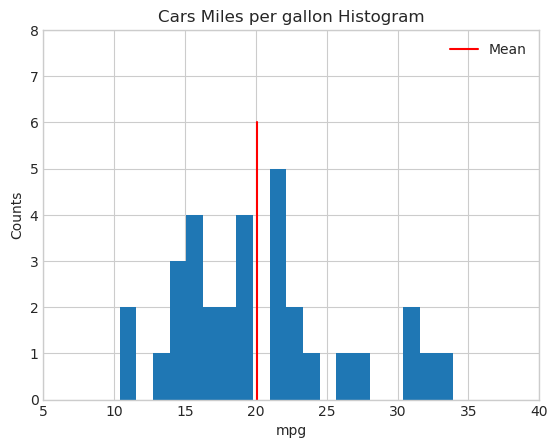

In [37]:
with sns.axes_style("whitegrid"):
    plt.hist(dfcars.mpg.values, bins=20)
    plt.xlim(5, 40)
    plt.ylim([0, 8])
    plt.axvline(dfcars.mpg.mean(), 0, 0.75, color='r', label='Mean')
    plt.xlabel("mpg")
    plt.ylabel("Counts")
    plt.title("Cars Miles per gallon Histogram")
    plt.legend()

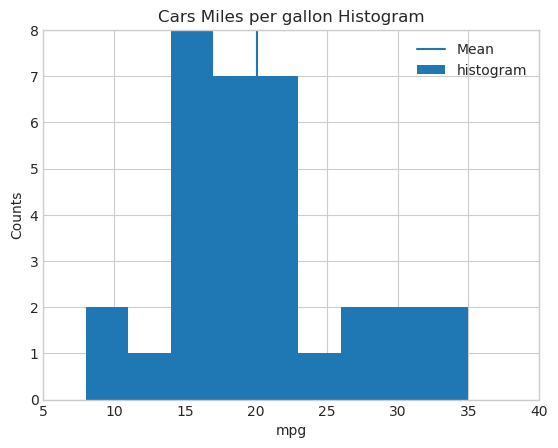

In [38]:
with sns.axes_style("whitegrid"):
    color = sns.color_palette()[0]
    plt.hist(dfcars.mpg.values, bins=range(5, 40, 3), label="histogram", color=color)
    plt.xlim(5, 40)
    plt.ylim([0, 8])
    plt.axvline(dfcars.mpg.mean(), 0, 1.0, color=color, label='Mean')
    plt.xlabel("mpg")
    plt.ylabel("Counts")
    plt.title("Cars Miles per gallon Histogram")
    plt.legend()

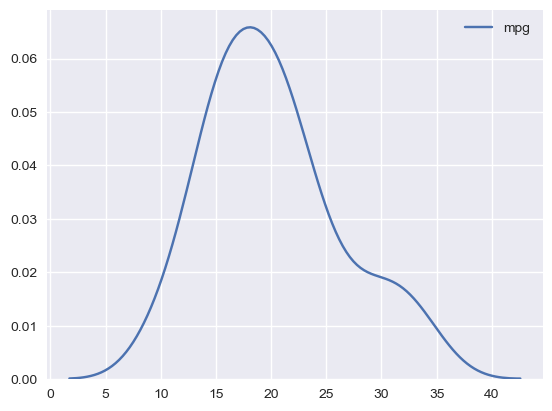

In [39]:
# Kernel Density Estimates (KDE) 
sns.set()
sns.kdeplot(dfcars.mpg)

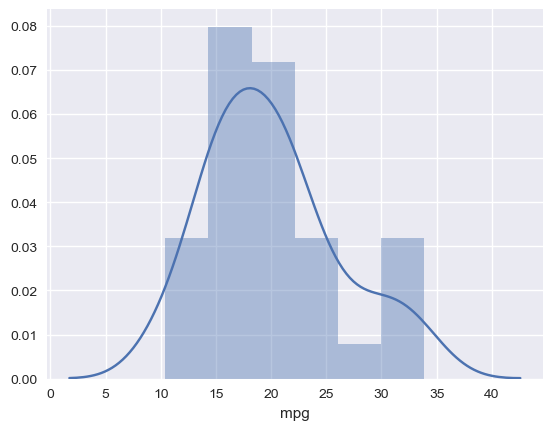

In [40]:
sns.distplot(dfcars.mpg)

In [ ]:
# Plotting features against other features

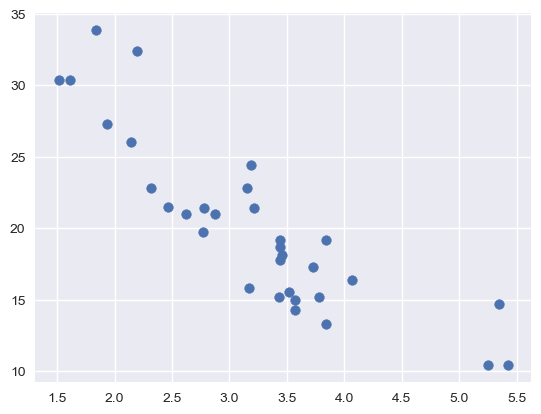

In [42]:
plt.scatter(dfcars.wt, dfcars.mpg)

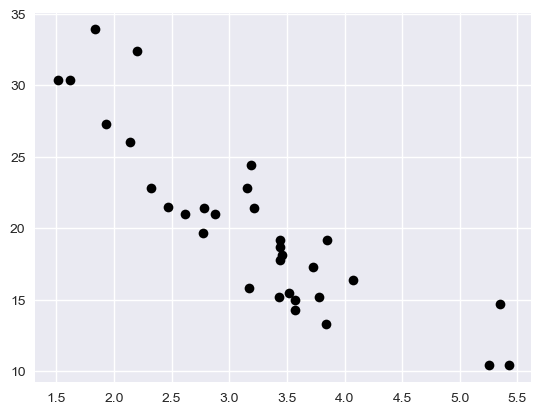

In [43]:
plt.plot(dfcars.wt, dfcars.mpg, marker='o', linestyle='None', color='k')

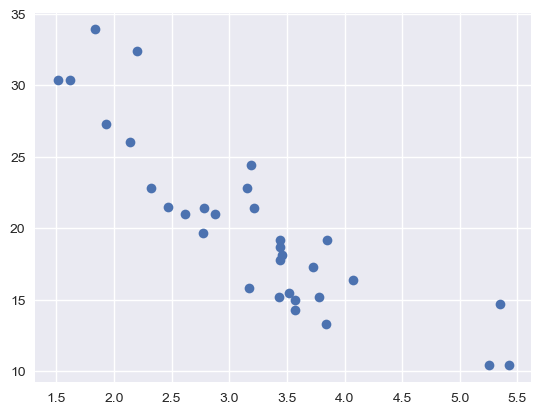

In [44]:
plt.plot(dfcars.wt, dfcars.mpg, 'o')
plt.show()

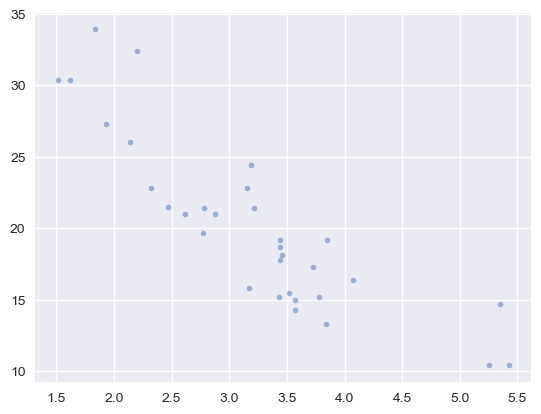

In [45]:
plt.plot(dfcars.wt, dfcars.mpg, 'o', markersize=4, alpha=0.5)
plt.savefig('foo1.pdf')
plt.savefig('foo2.png', bbox_inches='tight') #less whitespace around image

In [ ]:
# trend

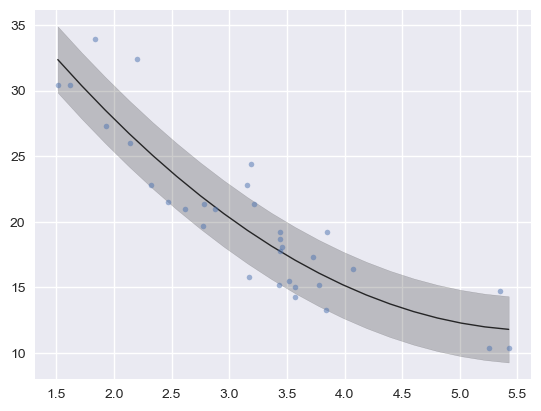

In [46]:
x = dfcars.wt
y = dfcars.mpg
params = np.polyfit(x, y, 2)
xp = np.linspace(x.min(), x.max(), 20)
yp = np.polyval(params, xp)
plt.plot(xp, yp, 'k', alpha=0.8, linewidth=1)
plt.plot(dfcars.wt, dfcars.mpg, 'o', markersize=4, alpha=0.5)
sig = np.std(y - np.polyval(params, x))
plt.fill_between(xp, yp - sig, yp + sig, 
                 color='k', alpha=0.2)

In [ ]:
# Group Properties

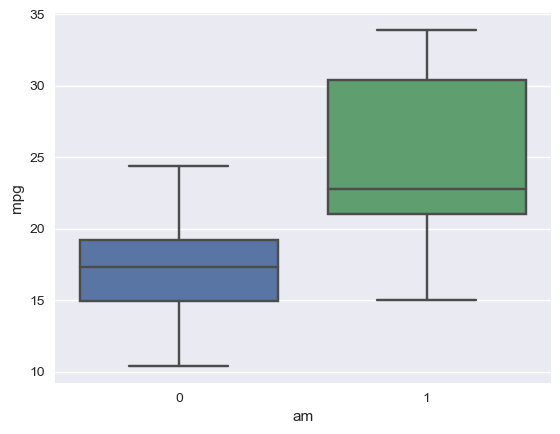

In [47]:
sns.boxplot(x='am', y='mpg', data=dfcars)

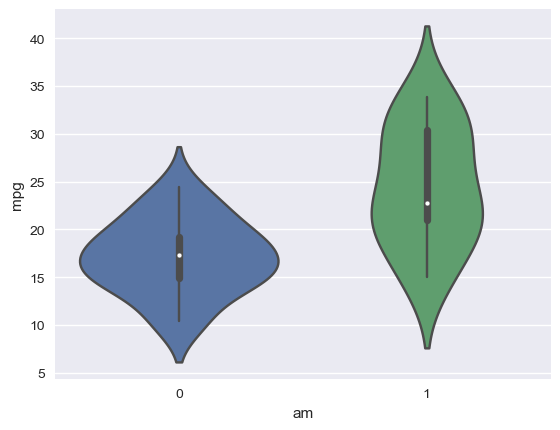

In [48]:
sns.violinplot(x='am', y='mpg', data=dfcars)

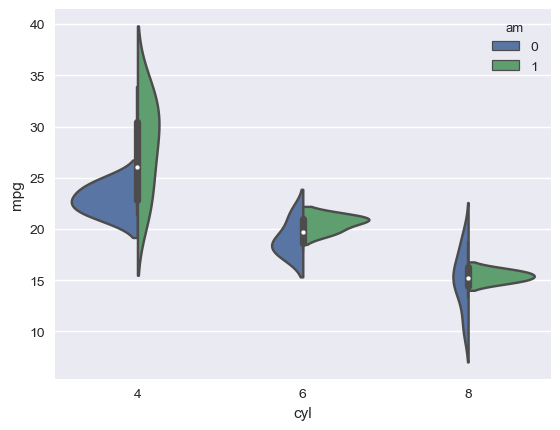

In [49]:
sns.violinplot(x='cyl', y='mpg', hue='am', order=[4, 6, 8], data=dfcars, split=True);

In [50]:
# crosstable
pd.crosstab(dfcars.am, dfcars.cyl)

cyl,4,6,8
am,,,
0,3,4,12
1,8,3,2


In [ ]:
# Faceting for general grouping

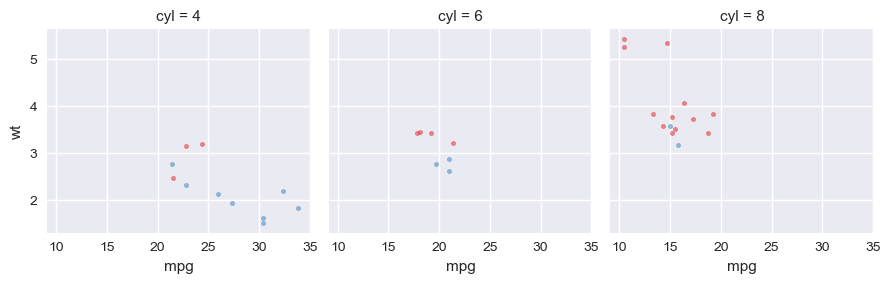

In [51]:
g = sns.FacetGrid(dfcars, col="cyl", hue="am", palette="Set1")
g.map(plt.scatter, "mpg", "wt", alpha=0.5, s=10)

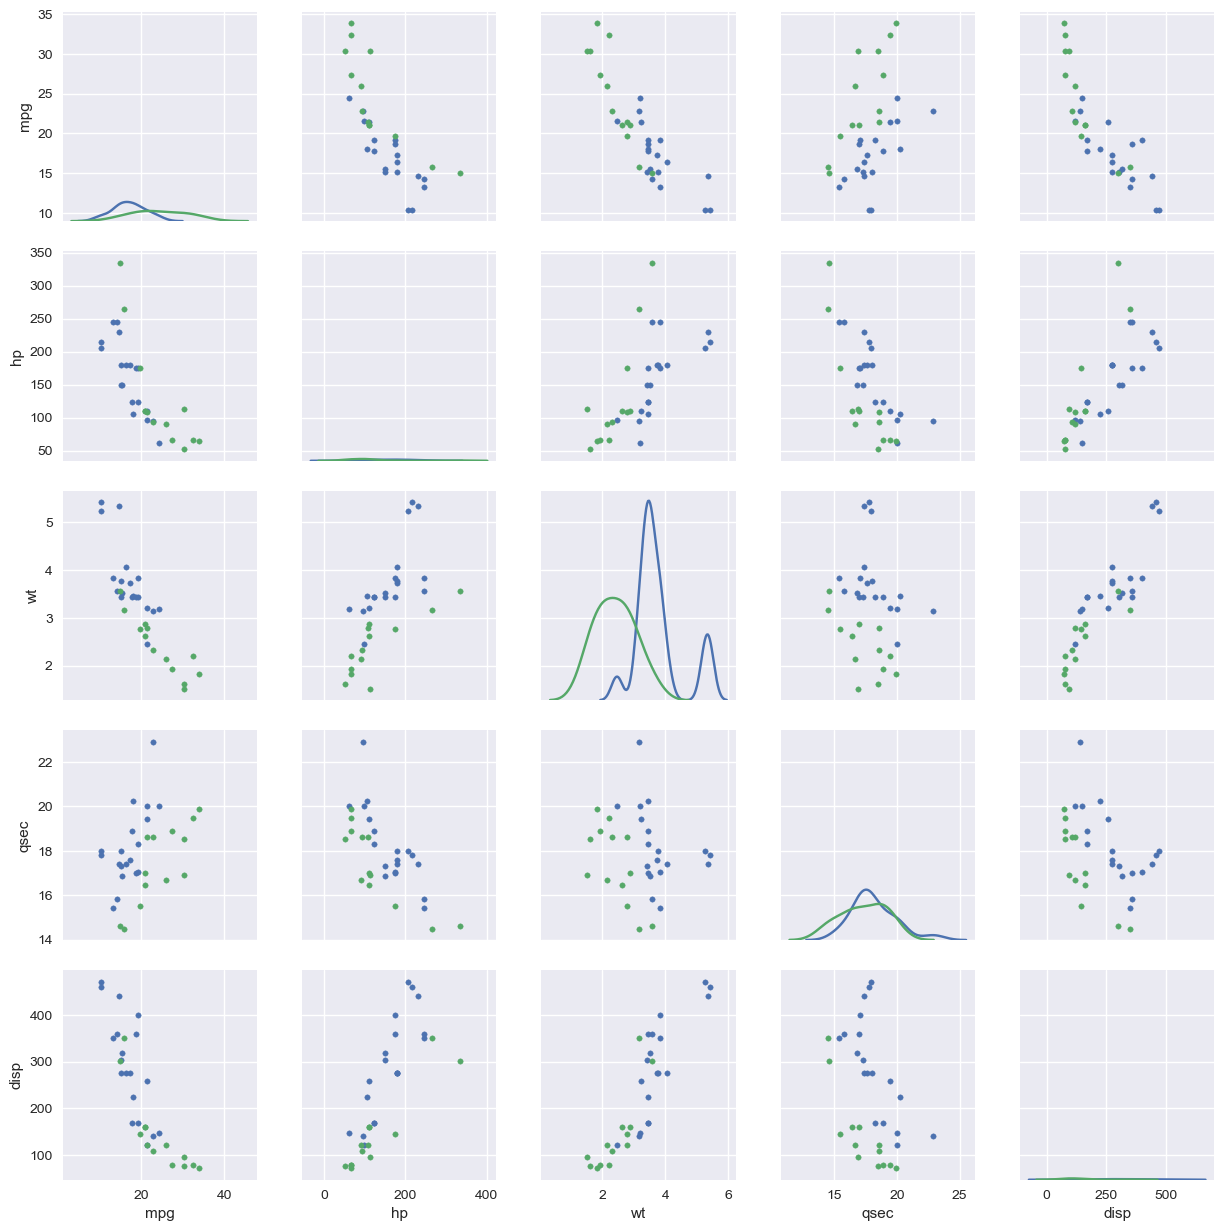

In [52]:
g = sns.PairGrid(dfcars, vars=['mpg', 'hp', 'wt', 'qsec', 'disp'], hue="am")
g.map_diag(sns.kdeplot)
g.map_offdiag(plt.scatter, s=15)

In [ ]:
# correlation

In [53]:
dfcars[['mpg', 'wt', 'hp', 'qsec', 'disp']].corr()

,mpg,wt,hp,qsec,disp
mpg,1.000000,-0.867659,-0.776168,0.418684,-0.847551
wt,-0.867659,1.000000,0.658748,-0.174716,0.887980
hp,-0.776168,0.658748,1.000000,-0.708223,0.790949
qsec,0.418684,-0.174716,-0.708223,1.000000,-0.433698
disp,-0.847551,0.887980,0.790949,-0.433698,1.000000


interactive(children=(Dropdown(description='name', options=('RdBu', 'RdGy', 'PRGn', 'PiYG', 'BrBG', 'RdYlBu', …

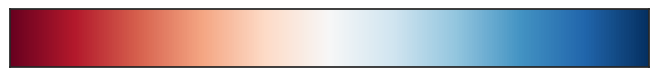

In [54]:
dpal = sns.choose_colorbrewer_palette('diverging', as_cmap=True)

([<matplotlib.axis.YTick at 0x22031c42550>,
 <a list of 4 Text yticklabel objects>)

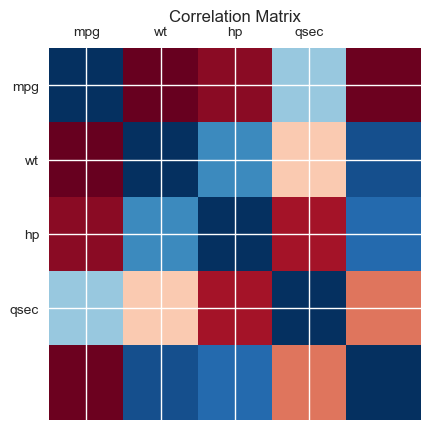

In [55]:
plt.matshow(dfcars[['mpg', 'wt', 'hp', 'qsec', 'disp']].corr(), cmap=dpal)
ax = plt.gca()
ax.tick_params(axis='both', which='both',length=0);
plt.title("Correlation Matrix")
plt.xticks(range(4), ['mpg', 'wt', 'hp', 'qsec', 'disp'])
plt.yticks(range(4), ['mpg', 'wt', 'hp', 'qsec', 'disp'])

In [ ]:
# KDE plots and sequential palettes

In [56]:
mean, cov = [0, 1], [(1, .5), (.5, 1)]
data = np.random.multivariate_normal(mean, cov, 1000)
df = pd.DataFrame(data, columns=["x", "y"])
df.head()

,x,y
0,-0.988286,0.393686
1,0.640067,0.165816
2,0.672848,1.791854
3,1.981928,1.864134
4,-0.990236,0.149811


interactive(children=(Dropdown(description='name', options=('Greys', 'Reds', 'Greens', 'Blues', 'Oranges', 'Pu…

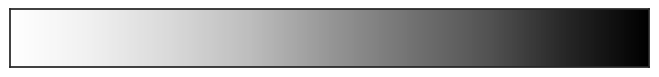

In [57]:
seqpal = sns.choose_colorbrewer_palette("sequential", as_cmap=True)

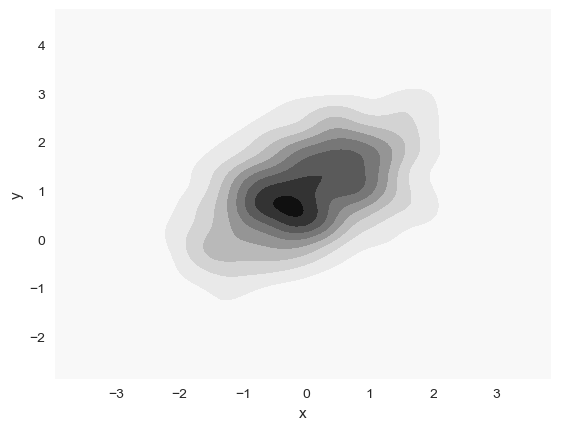

In [58]:
sns.kdeplot(df.x, df.y, cmap=seqpal, shade=True)

In [ ]:
# Matplotlib and multiple plots: Small Multiples

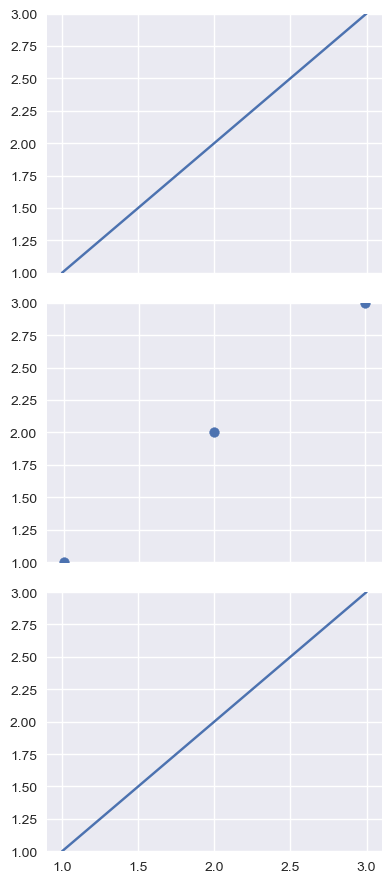

In [60]:
fig = plt.figure(figsize=(4, 9))

ax1 = fig.add_subplot(311)
ax1.plot([1, 2, 3], [1, 2, 3])
ax1.set_xticklabels([])
ax1.set_ylim([1.0, 3.0])

ax2 = fig.add_subplot(312)
ax2.scatter([1, 2, 3], [1, 2, 3])
ax2.set_xticklabels([])
ax2.set_ylim([1.0, 3.0])

ax3 = fig.add_subplot(313)
ax3.plot([1, 2, 3], [1, 2, 3])
ax3.set_ylim([1.0, 3.0])


fig.tight_layout()

In [ ]:
# Small multiples, youself

[[<matplotlib.axes._subplots.AxesSubplot object at 0x0000022031DCEE80>
(7, 13)
(10, 13)
(3, 13)
(12, 13)


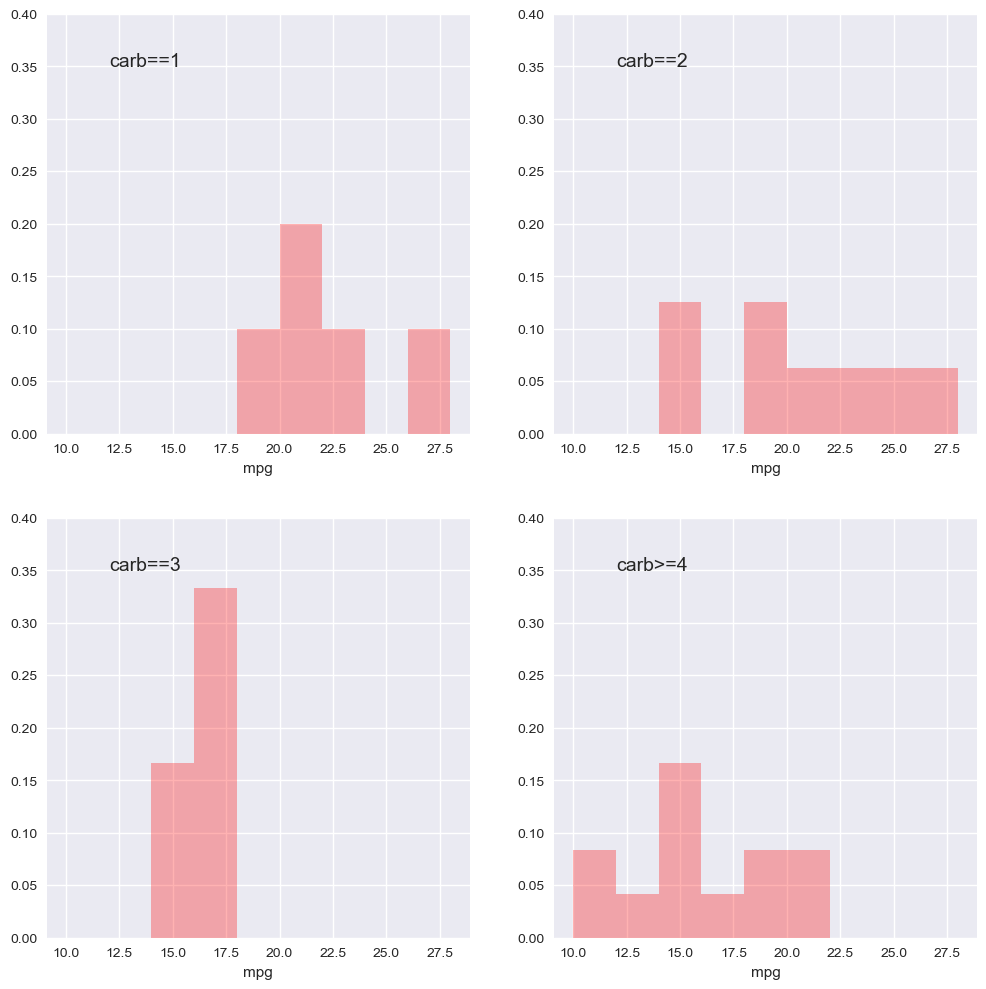

In [61]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 12))
print(axes)
print(axes.ravel())
carbs = ['==1', '==2', '==3', '>=4']
bins = np.arange(10, 30, 2)
for ax, carb in zip(axes.ravel(), carbs):
    data = dfcars.query("carb%s" % carb)
    print(data.shape)
    #ax.plot(data.wt, data.mpg, 'o', markersize=10, alpha=0.5)
    ax.hist(data.mpg, bins=bins, histtype='stepfilled', normed=True, color='r', alpha=.3)    
    ax.annotate("carb"+str(carb), xy=(12, 0.35), fontsize=14)
    #ax.set_yticks([])
    ax.set_ylim((0,0.4))
    ax.set_xlabel('mpg');

In [62]:
# contruct a dataframe
science = {
    'interest': ['Excited', 'Kind of interested', 'OK', 'Not great', 'Bored'],
    'before': [19, 25, 40, 5, 11],
    'after': [38, 30, 14, 6, 12]
}
dfscience = pd.DataFrame.from_dict(science).set_index("interest")[['before', 'after']]
dfscience

,before,after
interest,,
Excited,19,38
Kind of interested,25,30
OK,40,14
Not great,5,6
Bored,11,12


In [ ]:
# Multiple Pie Charts

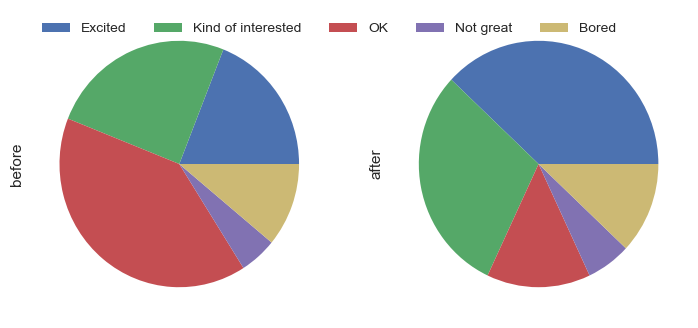

In [63]:
fig, axs = plt.subplots(1,2, figsize = (8.5,4))
dfscience.before.plot(kind="pie", ax=axs[0], labels=None);
axs[0].legend(loc="upper left", ncol=5, labels=dfscience.index)
dfscience.after.plot(kind="pie", ax=axs[1], labels=None)

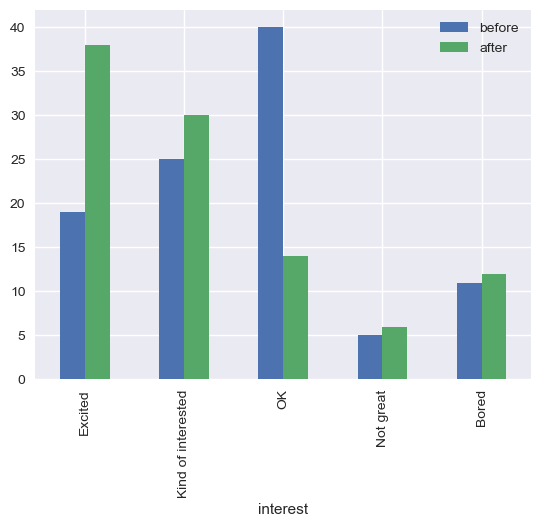

In [64]:
# Before and after bar charts
dfscience.plot(kind="bar")

In [ ]:
# Stacked Charts

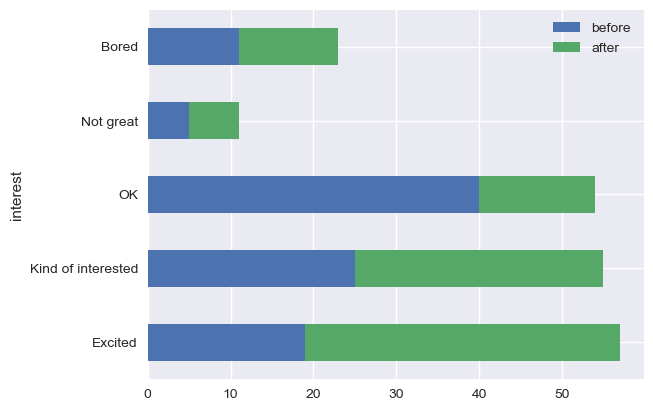

In [65]:
dfscience.plot(kind="barh", stacked=True)

In [66]:
dfscience.transpose()

interest,Excited,Kind of interested,OK,Not great,Bored
before,19,25,40,5,11
after,38,30,14,6,12


In [67]:
dfst = dfscience.transpose()
dfst.iloc[[1, 0],:]

interest,Excited,Kind of interested,OK,Not great,Bored
after,38,30,14,6,12
before,19,25,40,5,11


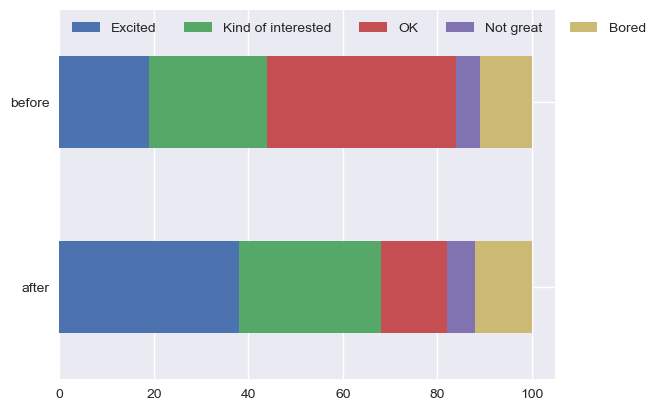

In [68]:
dfscience.transpose().loc[['after', 'before'], :].plot(kind="barh", stacked=True)
plt.legend(loc=2, ncol=5)

In [ ]:
# Difference Bar chart

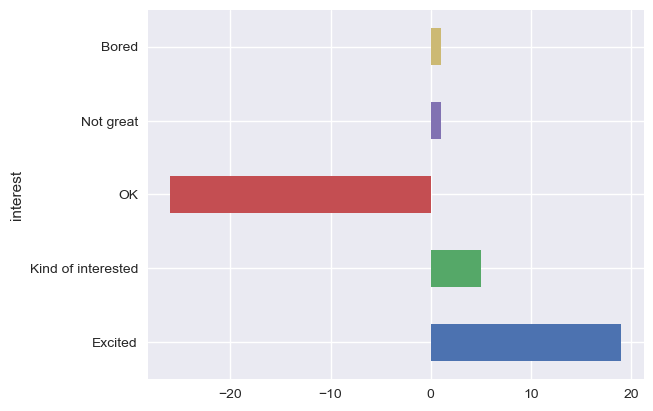

In [69]:
(dfscience.after - dfscience.before).plot(kind="barh")

In [ ]:
# Bacteria Dataset

In [70]:
antibiotics = [
  { "bacteria": "Mycobacterium tuberculosis", "penicillin": 800, "streptomycin": 5, "neomycin": 2, "gram": "negative" },
  { "bacteria": "Salmonella schottmuelleri", "penicillin": 10, "streptomycin": 0.8, "neomycin": 0.09, "gram": "negative" },
  { "bacteria": "Proteus vulgaris", "penicillin": 3, "streptomycin": 0.1, "neomycin": 0.1, "gram": "negative" },
  { "bacteria": "Klebsiella pneumoniae", "penicillin": 850, "streptomycin": 1.2, "neomycin": 1, "gram": "negative" },
  { "bacteria": "Brucella abortus", "penicillin": 1, "streptomycin": 2, "neomycin": 0.02, "gram": "negative" },
  { "bacteria": "Pseudomonas aeruginosa", "penicillin": 850, "streptomycin": 2, "neomycin": 0.4, "gram": "negative" },
  { "bacteria": "Escherichia coli", "penicillin": 100, "streptomycin": 0.4, "neomycin": 0.1, "gram": "negative" },
  { "bacteria": "Salmonella (Eberthella) typhosa", "penicillin": 1, "streptomycin": 0.4, "neomycin": 0.008, "gram": "negative" },
  { "bacteria": "Aerobacter aerogenes", "penicillin": 870, "streptomycin": 1, "neomycin": 1.6, "gram": "negative" },
  { "bacteria": "Brucella antracis", "penicillin": 0.001, "streptomycin": 0.01, "neomycin": 0.007, "gram": "positive" },
  { "bacteria": "Streptococcus fecalis", "penicillin": 1, "streptomycin": 1, "neomycin": 0.1, "gram": "positive" },
  { "bacteria": "Staphylococcus aureus", "penicillin": 0.03, "streptomycin": 0.03, "neomycin": 0.001, "gram": "positive" },
  { "bacteria": "Staphylococcus albus", "penicillin": 0.007, "streptomycin": 0.1, "neomycin": 0.001, "gram": "positive" },
  { "bacteria": "Streptococcus hemolyticus", "penicillin": 0.001, "streptomycin": 14, "neomycin": 10, "gram": "positive" },
  { "bacteria": "Streptococcus viridans", "penicillin": 0.005, "streptomycin": 10, "neomycin": 40, "gram": "positive" },
  { "bacteria": "Diplococcus pneumoniae", "penicillin": 0.005, "streptomycin": 11, "neomycin": 10, "gram": "positive" }
]
dfabio = pd.DataFrame.from_records(antibiotics)
dfabio

,bacteria,gram,neomycin,penicillin,streptomycin
0,Mycobacterium tuberculosis,negative,2.000,800.000,5.00
1,Salmonella schottmuelleri,negative,0.090,10.000,0.80
2,Proteus vulgaris,negative,0.100,3.000,0.10
3,Klebsiella pneumoniae,negative,1.000,850.000,1.20
4,Brucella abortus,negative,0.020,1.000,2.00
5,Pseudomonas aeruginosa,negative,0.400,850.000,2.00
6,Escherichia coli,negative,0.100,100.000,0.40
7,Salmonella (Eberthella) typhosa,negative,0.008,1.000,0.40
8,Aerobacter aerogenes,negative,1.600,870.000,1.00
9,Brucella antracis,positive,0.007,0.001,0.01


In [ ]:
# https://harvard-iacs.github.io/2018-CS109A/labs/lecture-3/notebook/